## Midterm Statistical Analysis Project

### Zhijing Zhang 

The Boston house-price data has been used in many regression problems.This is a very classic problem for the statistical analysis.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

It contains 506 rows, and 13 numeric/categorical predictive. Median Value (attribute **'medv'**) is usually the target.

In my project, I'm going to do the analyze between price and other attributes in the dataset.And keep going to do the predict of price using Linear Regression.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Boston House Price Dataset
boston_df = pd.read_csv("../data/Boston.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [63]:
boston_df.dtypes.head(-4)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

#### Introduce the attributes
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollar
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's dollar


In [76]:
#distribution
boston_df.describe().T.head(-4)

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Feature extraction

This part, I choose the 'crim', 'ptratio', and 'lstat' to do analysis

#### Distribution of total house prices

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

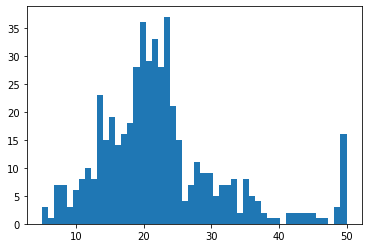

In [75]:
# Distribution of total house prices
plt.hist(boston_df['medv'], bins=50)

##### 1. Analyze ‘crim’
It is expected that if the crime rate in a town is high, the society will be unstable, the economy will be underdeveloped, and house prices will not be too high.
Scatter plot of urban per capita crime rate and house price

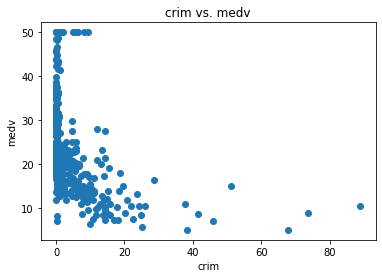

In [69]:
plt.scatter(boston_df['crim'], y)
plt.title('crim vs. medv')
plt.xlabel('crim')
plt.ylabel('medv')
plt.show()

#### Analysis conclusion:
1. Houses with high housing prices are concentrated in areas with low crime rates;
2. When the per capita crime rate in urban areas exceeds 20%, the highest house price is not higher than 20;
3. In the case of urban per capita crime rate in the (10, 20) range, the highest house price is not high.

#### 2.Analyze PTRATIO 
It is expected that with more teachers, there will be more education resources and higher housing prices.

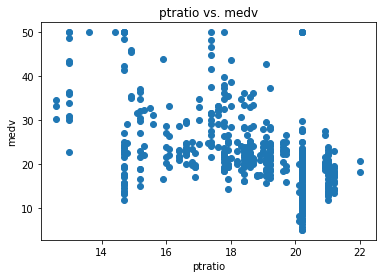

In [70]:
plt.scatter(boston_df['ptratio'], y)
plt.title('ptratio vs. medv')
plt.xlabel('ptratio')
plt.ylabel('medv')
plt.show()

##### Analysis conclusion:
1. When the student-teacher ratio is less than 14, the minimum house price is not less than 20, and most of them are higher than 30;
2. When the student-teacher ratio is in the range of (14, 20), the minimum housing price is not less than 10;
3. Only when the student-teacher ratio is greater than 20, the housing price will be lower than 10, and most of them will not be higher than 30.

#### 3. Analyze lstat
The simple idea is that the low-income class has a low proportion, the higher the degree of economic development, and the higher the price.

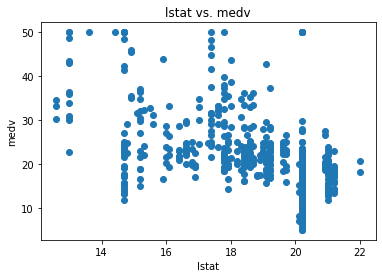

In [71]:
plt.scatter(boston_df['ptratio'], y)
plt.title('lstat vs. medv')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

##### Analysis conclusion:
1. Only when the proportion of low-income class is less than 10, the housing price will be higher than 35;
2. If the proportion of low-income class is less than 5, the minimum house price is not less than 20;
3. In the case where the proportion of low-income classes is in the (10,20) range, house prices are in the (10, 30) range;
4. When the proportion of low-income stratum is greater than 20, the highest housing price is not higher than 25.

#### Correlation heatmap 
- vmax sets the maximum discrimination value of the heat map color block
- square Set the picture to square or not
- annot set whether to display the coefficient value of each color block

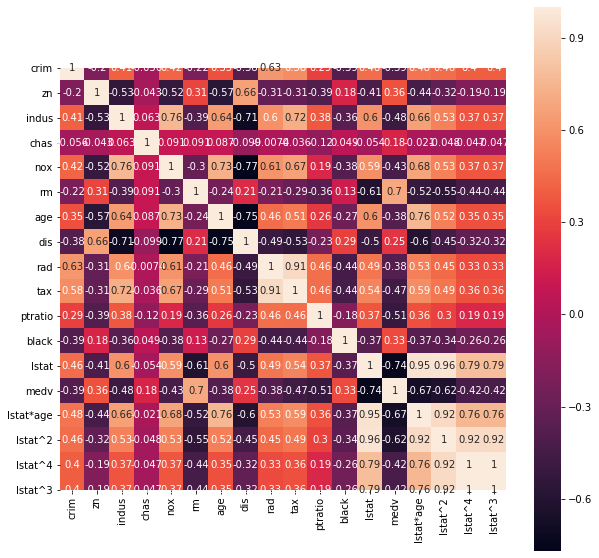

In [73]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),vmax=1,square=True,annot=True)

**The house price is strongly positively related to the average number of rooms in the house, strongly negatively related to the ratio of the region considered to be a low-income class, and also strongly negatively related to the ratio of students to teachers in the town.**

### Simple Linear Regression 

Text(0, 0.5, 'medv')

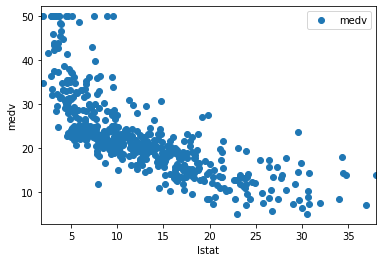

In [4]:
#relation between % lower status of the population and median value of owner-occupied homes in 1000's dollar
ax = boston_df.plot(x="lstat", y="medv", style="o")
ax.set_ylabel("medv")

In [7]:
# use linear Regression
# X is an "array" of column values, y is a single column value
X = boston_df[["lstat"]].values
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        13:12:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# produces an identical linear model as shown below:
reg = LinearRegression()
X = boston_df[["lstat"]].values
y = boston_df["medv"].values
reg.fit(X, y)
(reg.intercept_, reg.coef_)  #coef_: regression coefficient (slope) ;intercept_: intercept term

(34.55384087938311, array([-0.95004935]))

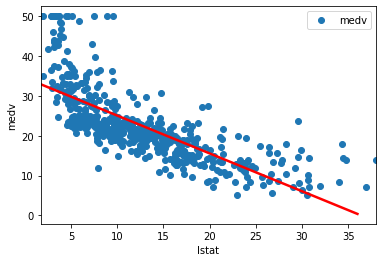

In [14]:
# Drawing the regression line on top of the scatterplot
ax = boston_df.plot(x="lstat", y="medv", style="o")
ax.set_ylabel("medv")

lstats = boston_df["lstat"].values
xs = range(int(np.min(X[:,0])), int(np.max(X[:,0])))
xs=np.array(list(xs)).reshape(-1,1) # change to array[] to reshape
ys = [reg.predict([x]) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

In [15]:
# Prediction
test_data = [[5], [10], [15]]
reg.predict(test_data)

array([29.80359411, 25.05334734, 20.30310057])

### Multiple Linear Regression ###

In [8]:
# regression with 2 input columns
X = boston_df[["lstat", "age"]]
reg2 = LinearRegression()
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(33.222760531792929, array([-1.03206856,  0.03454434]))

In [16]:
# regression using all input columns
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
reg3 = LinearRegression()
reg3.fit(X, y)
(reg3.intercept_, reg3.coef_)

(36.45948838509008,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

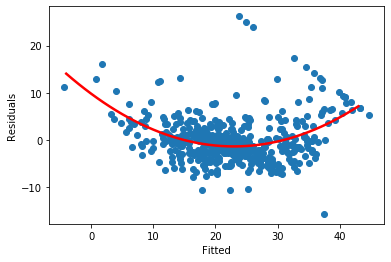

In [17]:
# Plotting a fitted regression with R returns 4 graphs - Residuals vs Fitted, Normal Q-Q,
# Scale-Location (Standardized Residuals vs Fitted), and Residuals vs Leverage. Only the 
# Q-Q plot is available from statsmodels. The residuals vs Fitted function is implemented
# below and is used for plot #1 and #3.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = reg3.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

**Seeing a curve relationship, this implies that you may need to add a quadratic term to the regression model**

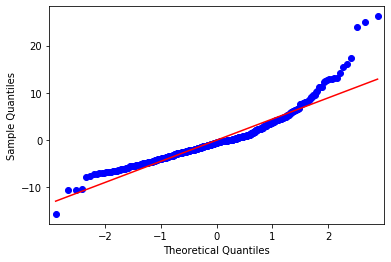

In [20]:
fig = sm.qqplot(residuals, dist="norm", line="r") 

**not the 45 degree, does not conform to normality**

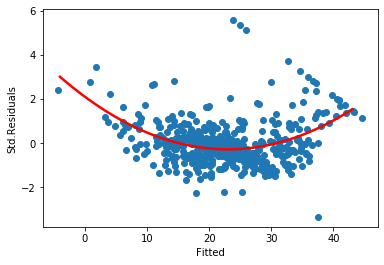

In [19]:
residuals_vs_fitted(fitted, std_residuals, "Fitted", "Std.Residuals")

**Meet the requirement of homoscedasticity. The points around the horizontal line are randomly distributed.**

### Nonlinear Terms and Interactions 

In [21]:
# fitting medv ~ lstat * age
boston_df["lstat*age"] = boston_df["lstat"] * boston_df["age"]
reg5 = LinearRegression()
X = boston_df[["lstat", "age", "lstat*age"]]
y = boston_df["medv"]
reg5.fit(X, y)
(reg5.intercept_, reg5.coef_)

(36.088535934612906,
 array([-1.39211684e+00, -7.20859509e-04,  4.15595185e-03]))

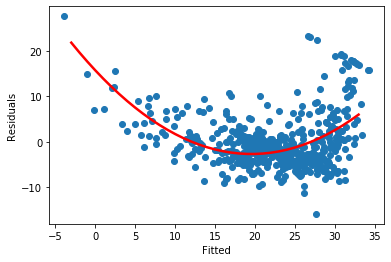

In [22]:
fitted = reg5.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [51]:
# fitting medv ~ lstat + I(lstat^2)
boston_df["lstat^2"] = boston_df["lstat"] ** 2
reg6 = LinearRegression()
X = boston_df[["lstat", "lstat^2"]]
y = boston_df["medv"]
reg6.fit(X, y)
# save the predicted ys for given xs for future plot
lstats = boston_df["lstat"].values
xs = range(int(np.min(lstats)), int(np.max(lstats)))
ys6 = [reg6.predict([[x, x*x]]) for x in xs] #predict([[]]) for 2d
(reg6.intercept_, reg6.coef_)

(42.862007328169355, array([-2.3328211 ,  0.04354689]))

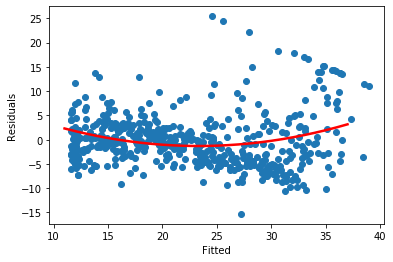

In [52]:
fitted = reg6.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [54]:
# fitting medv ~ poly(lstat,4). We already have lstat^2 and lstat from previous
boston_df["lstat^4"] = np.power(boston_df["lstat"], 4)
boston_df["lstat^3"] = np.power(boston_df["lstat"], 4)
X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
y = boston_df["medv"]
reg7 = LinearRegression()
reg7.fit(X, y)
ys7 = [reg7.predict([[x**4, x**3, x**2, x]]) for x in xs]
(reg7.intercept_, reg7.coef_)

(46.80094398779788,
 array([-1.17511361e-05, -1.17511368e-05,  9.23027375e-02, -3.27115207e+00]))

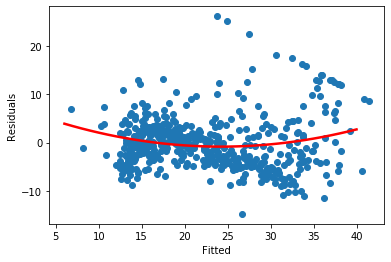

In [55]:
fitted = reg7.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

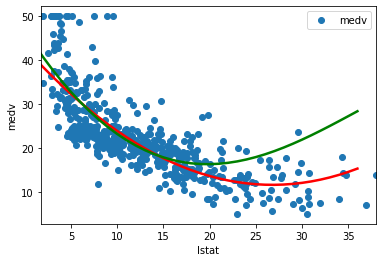

In [56]:
# Plot the different lines. Not that the green line (reg7) follows the distribution
# better than the red line (reg6).
ax = boston_df.plot(x="lstat", y="medv", style="o")
ax.set_ylabel("medv")
plt.plot(xs, ys6, color='r', linewidth=2.5)
plt.plot(xs, ys7, color='g', linewidth=2.5)